0 -4.144832625267251e-17
1 1.0000000000000004
2 3.0000000000000004
3 -3.9999999999999996
4 5.995204332975846e-16
5 8.881784197001252e-16
6 -1.7162197588997212e-15
7 -3.5971225997855074e-16
8 -2.590520390792032e-17
9 -2.2241467926657305e-15


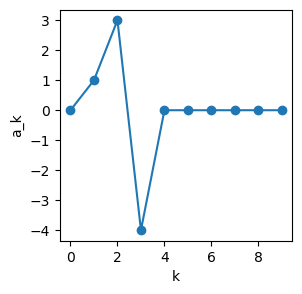

In [9]:
import matplotlib.pylab as plt
import math
import numpy as np


# This is the simpson integration routine to use in this assignment
def simpson(fun,a,b,n):
    # Specifications of the Simpson integration procedure
    h = (b-a)/float(n)
    x0 = a
    xn = b
    y0 = fun(x0)
    yn = fun(xn)

    # The weighted average of the integral can be decomposed into sums over odd and even indexes
    feven = 0.0
    fodd = 0.0
    for j in range(2,n,2):
        xeven = a + j*h
        feven += fun(xeven)

        xodd = a +(j-1)*h
        fodd += fun(xodd)

    # range method above yet skips the last odd term 
    xodd = a + (n-1) * h
    fodd += fun(xodd)

    # final weighted average of the simpson integration procedure
    intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
    
    return intfun




# Define parameters for the problem (For problem 1.2b, omega = 1 and T is the period)
omega = 1.0
T = 2.0*math.pi/omega

# limits of the integration
a = 0.0
b = T

# number of points to calculate the integral (50 integration elements may be sufficient)
n = 50

# Number of coefficients to be calculated (set up to 10 coefficients for now)
nc = 10

# define the function that will be expanded in terms of Fourier series
def function(t):
    #return math.sin(omega*t)
    return math.cos(omega*t) + 3*math.cos(2*omega*t) - 4*math.cos(3*omega*t)

# calculate the coefficient a_0 first! That is just integrating the function directly over the interval [a,b]
intf = simpson(function, a, b, n)
a0 = intf/T
print(0,a0)

# Initiate lists that will store all Fourier coeffcients (k=0 and k>0). 
# But we can store already our a0 coefficient on the list.
a_manual_list = [a0]
b_manual_list = [0.0]

# define functions that will calculate all other coefficients
def fak(t):
    return function(t)*math.cos(k*omega*t)

#def fbk(t):
#    return
    
# All functions defined above are 'idle'. We are now going to loop over the coefficients components
# to calculate all other coefficients from k=1 upt to k=nc. Just use a simple for-loop for that.
# for-loop over number of coefficients
for k in range(1,nc):
    #implement the calculation of Fourier coefficients here.
    intf = simpson(fak, a, b, n)
    ak = 2.0*intf/T
    a_manual_list.append(ak)
    print(k,ak)
    
# After the loop is completed and new coefficients are appended on the lists, 
# add plot instructions that will make a graphic for a_k and b_k versus k in the same panel.
plt.figure(figsize=(3,3))
plt.plot(range(nc), a_manual_list, marker='o')
plt.ylabel('a_k')
plt.xlabel('k')
plt.show()
